# Introduction to Python exceptions

All exception classes are the subclasses of the ``BaseException`` class.

However, almost all built-in exception classes inherit from the ``Exception`` class, which is the subclass of the ``BaseException`` class:

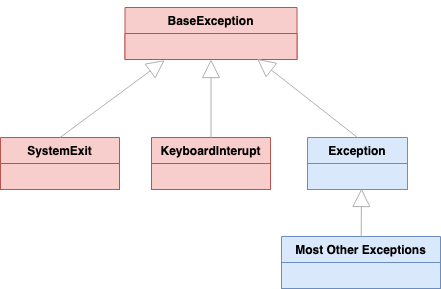

The following example defines a list of three elements and attempts to access the fourth one which caused the ``IndexError`` exception due to invalid index.

To handle exceptions, we use the try statement. The try statement has the following clauses:

```python

try:
    # code that you want to protect from exceptions
except <ExceptionType> as ex:
    # code that handle the exception
finally:
    # code that always execute whether the exception occurred or not
else:
    # code that excutes if try execute normally (an except clause must be present)

```

### try

In the try clause, we place the code that protects from one or more potential exceptions.

The try clause appears exactly one time in the try statement.

### except

In the except clause, we place the code that handles a specific exception type. A try statement can have zero or more except clauses. Typically, each except clause handles different exception types in specific ways.

In an except clause, the as ex is optional. And the <ExceptionType> is also optional. However, if you omit the <ExceptionType> as ex, we’ll have a bare exception handler.

When specifying exception types in the except clauses, we place the most specific to least specific exceptions from top to bottom.

If we have the same logic that handles different exception types, we can group them in a single except clause. For example:

```python
try:
...
except <ExceptionType1> as ex:
    log(ex)
except <ExceptionType2> as ex:
    log(ex)
```

```python
try:
...
except (<ExceptionType1>, <ExceptionType2>) as ex:
    log(ex)
```
It’s important to note that the except order matters because Python will run the first except clause whose exception type matches the occurred exception.

### finally
The finally clause may appear zero or 1 time in a try statement. The finally clause always executes whether an exception occurred or not.

### else
The else clause also appears zero or 1 time. And the else clause is only valid if the try statement has at least one except clause.

Typically, we place the code that executes if the try clause terminates normally.

In [15]:
colors = ['red', 'green', 'blue']

try:
    print(colors[3])
except Exception as e:
    print(e.__class__, '-', e)

print('Continue to run')

<class 'IndexError'> - list index out of range
Continue to run


## Catching Multiple Exceptions

Suppose we need to defines a ``division`` function that returns the result of a is divided by b.

``division`` function returns a dictionary that has three elements:

-   **success** is a boolean value that indicates whethere the operation is successful or not.
-   **message** indicates the error or success message.
-   **result** stores the result of a / b or None if b is zero.

If b is zero, the ``ZeroDivisionError`` exception will occur. 

If the ``ZeroDivisionError`` occurs,the ``divison`` returns following output:

```
{
    'success': False, 
    'message': 'b cannot be zero', 
    'result': None
}

```

However, if we pass two strings instead of two numbers to the ``division`` function, we’ll get ``TypeError``.

Following program defines ``divison`` function that catch ``ZeroDivisionError`` and ``TypeError``.



In [19]:
def division(a, b):
    try:
        return {
            'success': True,
            'message': 'OK',
            'result': a / b
        }
    except TypeError as e:
        return {
            'success': False,
            'message': 'Both a & b must be numbers',
            'result': None
        }
    except ZeroDivisionError as e:
        return {
            'success': False,
            'message': 'b cannot be zero',
            'result': None
        }
    except Exception as e:
        return {
            'success': False,
            'message': str(e),
            'result': None
        }


result = division('10', '2')
print(result)
result = division(10, 0)
print(result)
result = division(10, 5)
print(result)

{'success': False, 'message': 'Both a & b must be numbers', 'result': None}
{'success': False, 'message': 'b cannot be zero', 'result': None}
{'success': True, 'message': 'OK', 'result': 2.0}


Above example shows that one should always handle the exceptions from the most specific to the least specific.

If the code that handles different exceptions are the same, we can group all exceptions into one as follows:

```python
def division(a, b):
    try:
        return {
            'success': True,
            'message': 'OK',
            'result': a / b
        }
    except (TypeError, ZeroDivisionError, Exception) as e:
        return {
            'success': False,
            'message': str(e),
            'result': None
        }


result = division(10, 0)
print(result)
```

## Except order 

When we catch an exception in the except clause, you need to place the exceptions from most specific to the least specific in terms of exception hierarchy.

The following shows three exception classes: ``Exception``, ``LookupError``, and ``IndexError``:

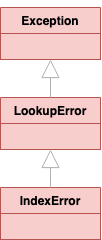

If we catch the exception, we need to place them in the following order: ``IndexError``, ``LookupErorr``, and ``Exception``.

For example, the following defines a list of three strings and attempts to access the 4th element:

In [20]:
colors = ['red', 'green', 'blue']
try:
    print(colors[3])
except IndexError as e:
    print(type(e), 'Index error')
except LookupError as e:
    print(type(e), 'Lookup error')

<class 'IndexError'> Index error


The ``colors[3]`` access causes an ``IndexError`` exception. However, if we swap the ``except`` clauses and ``catch`` the ``LookupError`` first and the ``IndexError`` second like this:

```python
colors = ['red', 'green', 'blue']
try:
    print(colors[3])
except LookupError as e:
    print(type(e), 'Lookup error')
except IndexError as e:
    print(type(e), 'Index error')
```

The output is still ``<class 'IndexError'> Lookup error`` but the message is misleading.

Please note that when we handle an exception, the exception handler will catch the exception type we specify and any of its subclasses.

## Bare exception handlers

A bare exception handler does not specify an exception type:

```python

try:
    ...
except:
    ...


```

It is equivalent to the following:

```python

try:
    ...
except BaseException:

    ...

```

A bare exception handler will catch any exceptions including the ``SystemExit`` and ``KeyboardInterupt`` exceptions.

A bare exception will make it harder to interrupt a program with Control-C and disguise other programs.

In practice, we should avoid using bare exception handlers.

## sys.exc_info()

To get exception information from a bare exception handler, we use the ``exc_info()`` function from the ``sys`` module.

The ``sys.exc_info()`` function returns a tuple that consists of three values:

-   ``type`` is the type of the exception occurred. It’s a subclass of the ``BaseException``.
-   ``value`` is the instance of the exception type.
-   ``traceback`` is an object that encapsulates the call stack at the point where the exception originally ocurred.

The following example uses the ``sys.exc_info()`` function to examine the exception when a string is divided by a number:

In [21]:
import sys

try:
    '20' / 2
except:
    exc_info = sys.exc_info()
    print(exc_info)

(<class 'TypeError'>, TypeError("unsupported operand type(s) for /: 'str' and 'int'"), <traceback object at 0x104a2bfc0>)


The output shows that the code in the try clause causes a TypeError exception.Therefore, we can modify the code to handle it specifically as follows:

```python

try:
    '20' / 2
except TypeError as e:
    print(e)

```    

# Raise Statement

To raise an exception, we use the ``raise`` statement:

```python
raise ExceptionType()
```

The ``ExceptionType()`` must be subclass of the ``BaseException`` class. 

Typically, it is a subclass of the ``Exception`` class. 

>Note that the ``ExceptionType`` doesn’t need to be directly inherited from the ``Exception`` class. It can indirectly inherit from a class that is a subclass of the Exception class.

The BaseException class has the ``__init__`` method that accepts an *args argument. It means that you can pass any number of arguments to the exception object when raising an exception.

The following example uses the ``raise`` statement to raise a ValueError exception. It passes three arguments to the ValueError ``__init__`` method:

In [22]:
try:
    raise ValueError('The value error exception', 'x', 'y')
except ValueError as ex:
    print(ex.args)

('The value error exception', 'x', 'y')


## Reraise the current exception

If we ``raise`` statement without specifying an exception object, it re-raises the exception currently being handled. 

This approach is useful if we want to handle an exception in some way (like logging it) and then allow it to propagate up the call stack.

In the following example, if we pass zero to the second argument of the ``division()`` function, the ``ZeroDivisionError`` exception will occur.

However, instead of handling the exception, we can log the exception and raise it again.

In [24]:
def division(a, b):
    try:
        return a / b
    except ZeroDivisionError as ex:
        print('Logging exception:', str(ex))
        raise

division(1,0)    

Logging exception: division by zero


ZeroDivisionError: division by zero

## Raise another exception during handling an exception

Suppose we want to raise ``ValueError`` error if the ``ZeroDivisionError`` occurs, we can modify the above code as below:

In [25]:
def division(a, b):
    try:
        return a / b
    except ZeroDivisionError as ex:
        raise ValueError('b must not zero')
    
division(1,0)    

ValueError: b must not zero

First, the ``ZeroDivisionError`` exception occurs:

```python
Traceback (most recent call last):
  File "C:/pythontutorial/app.py", line 3, in division
    return a / b
ZeroDivisionError: division by zero
```

Second, during handling the ``ZeroDivisionError`` exception, the ``ValueError`` exception occurs:

```python
Traceback (most recent call last):
  File "C:/pythontutorial/app.py", line 8, in <module>
    division(1, 0)
  File "C:/pythontutorial/app.py", line 5, in division
    raise ValueError('b must not zero')
ValueError: b must not zero
```

## Introduction to the Python raise from statement

The ``raise from`` statement has the following syntax:

```python
raise <ExceptionType> from <cause>
```

Technically, it’s equivalent to the following:

```python
ex = ExceptionType
ex.__cause__ = cause
raise ex
```

By default, the ``__cause__`` attribute on exception objects is always initialized to None.

### Example

In [27]:
def divide(a, b):
    try:
        return a / b
    except ZeroDivisionError as ex:
        raise ValueError('b must not be zero')

The ``divide()`` function has an exception handler that catches the ``ZeroDivisionError`` exception. Inside the handler, we raise a new ``ValueError`` exception. 

If we pass zero to the second argument of the ``divide()`` function, we’ll get the following stack trace:

In [28]:
divide(1,0)

ValueError: b must not be zero

The import message is:

```
During handling of the above exception, another exception occurred:
```
It means that while we were handling the ``ZeroDivisionError`` exception, the ``ValueError`` exception occurred.

To instruct Python that we want to modify and forward the ``ZeroDivisionError`` exception, we can use the ``raise`` from statement like this:

In [29]:
def divide(a, b):
    try:
        return a / b
    except ZeroDivisionError as ex:
        raise ValueError('b must not be zero') from ex

divide(10, 0)

ValueError: b must not be zero

Now, we receive the ValueError exception with a cause added to the ``__cause__`` attribute of the exception object.

The following modifies the above code to show the ``__cause__`` attribute of the ValueError exception:

In [30]:
def divide(a, b):
    try:
        return a / b
    except ZeroDivisionError as ex:
        raise ValueError('b must not be zero') from ex


try:
    divide(10, 0)
except ValueError as ex:
    print('cause:', ex.__cause__)
    print('exception:', ex)

cause: division by zero
exception: b must not be zero


## raise exception from None

If the cause of the exception is not important, we can omit the cause by using the raise exception from None statement:

```python
raise <ExceptionType> from None
```

For example, we can hide the cause of the ``ValueError`` exception in the ``divide()`` function as follows:

In [31]:
def divide(a, b):
    try:
        return a / b
    except ZeroDivisionError:
        raise ValueError('b must not be zero') from None


try:
    divide(10, 0)
except ValueError as ex:
    print('cause:', ex.__cause__)
    print('exception:', ex)

cause: None
exception: b must not be zero


## Introduction to the Python custom exception

To create a custom exception class, we define a class that inherits from the built-in Exception class or one of its subclasses such as ``ValueError`` class:

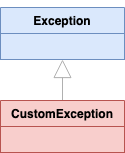

The following example defines a ``CustomException`` class that inherits from the ``Exception`` class:

```python
class CustomException(Exception):
    """ my custom exception class """
```

>Note that the CustomException class has a docstring that behaves like a statement. Therefore, we don’t need to add the pass statement to make the syntax valid.

To raise the ``CustomException``, we use the ``raise`` statement.

```python
class CustomException(Exception):
    """ my custom exception class """


try:
    raise CustomException('This is my custom exception')
except CustomException as ex:
    print(ex)
```

Like standard exception classes, custom exceptions are also classes. Hence, we can add functionality to the custom exception classes like:

-   Adding attributes and properties.
-   Adding methods e.g., log the exception, format the output, etc.
-   Overriding the  ``__str__`` and ``__repr__`` methods
-   And doing anything else that you can do with regular classes.

### Custom Exception Example

Suppose we need to develop a program that converts a temperature from Fahrenheit to Celsius.

The minimum and maximum values of a temperature in Fahrenheit are 32 and 212. If users enter a value that is not in this range, you want to raise a custom exception e.g., ``FahrenheitError``.

The following defines the ``FahrenheitError`` exception class:


In [32]:
class FahrenheitError(Exception):
    min_f = 32
    max_f = 212

    def __init__(self, f, *args):
        super().__init__(args)
        self.f = f

    def __str__(self):
        return f'The {self.f} is not in a valid range {self.min_f, self.max_f}'
    
# The following defines the fahrenheit_to_celsius function that accepts a temperature in Fahrenheit and returns a temperature in Celcius:

'''The fahrenheit_to_celsius function raises the FahrenheitError excpetion if the input temperature is not in the valid range. 
Otherwise, it converts the temperature from Fahrenheit to Celcius.'''

def fahrenheit_to_celsius(f: float) -> float:
    if f < FahrenheitError.min_f or f > FahrenheitError.max_f:
        raise FahrenheitError(f)

    return (f - 32) * 5 / 9    

The following main program uses the ``fahrenheit_to_celsius`` function and the ``FahrenheitError`` custom exception class:

In [38]:
if __name__ == '__main__':
    f = input('Enter a temperature in Fahrenheit:')
    try:
        f = float(f)
    except ValueError as ex:
        print(ex)
    else:
        try:
            c = fahrenheit_to_celsius(float(f))
        except FahrenheitError as ex:
            print(ex)
        else:
            print(f'{f} Fahrenheit = {c:.4f} Celsius')

89.0 Fahrenheit = 31.6667 Celsius


Above program will print below output, if we give 6789 as input parameter. 

```python
The 6789.0 is not in a valid range (32, 212)
```

Also, if we give input as "89", we will get below output:-

```python
could not convert string to float: '"89"'
```

If we give 89 as input parameter, will get ``89.0 Fahrenheit = 31.6667 Celsius`` in output.

### Another example of try...catch...else

In [40]:
def calculate_bmi(height, weight):
    """ calculate body mass index (BMI) """
    return weight / height**2


def evaluate_bmi(bmi):
    """ evaluate the bmi """
    if 18.5 <= bmi <= 24.9:
        return 'healthy'

    if bmi >= 25:
        return 'overweight'

    return 'underweight'

def main():
    try:
        height = float(input('Enter your height (meters):'))
        weight = float(input('Enter your weight (kilograms):'))

    except ValueError as error:
        print('Error! please enter a valid number.')
    else:
        bmi = round(calculate_bmi(height, weight), 1)
        evaluation = evaluate_bmi(bmi)

        print(f'Your body mass index is {bmi}')
        print(f'This is considered {evaluation}!')

main()

Your body mass index is 0.0
This is considered underweight!
